In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class controlRun:
    #list of controlVars
    #read one
    #read all
    pass
class controlVar:
    #searchstring
    #type: output? input? controllledVar? state?
    #
    pass

In [3]:
logFilename = "log.pimpleFoam"
#preallocate estimate of list size
defaultSize = int(5e5)
omegaT = [0] * defaultSize
angleT = [0] * defaultSize
errorT = [0] * defaultSize
integralErrorT = [0] * defaultSize
differentialErrorT = [0] * defaultSize
rawOmegaT = [0] * defaultSize
rawAngleT = [0] * defaultSize
controlledVarT = [0] * defaultSize
Time = [0] * defaultSize
namesList = ["Time","Cl","omega","angle","error","integralError","differentialError","rawOmega","rawAngle"]
varList = [Time,controlledVarT,omegaT,angleT,errorT,integralErrorT,differentialErrorT,rawOmegaT,rawAngleT]
searchList = ["Time =","(Cl)","Saturated omega","Saturated angle","error  ","errorIntegral","errorDifferential","Raw omega","Raw angle"]

In [4]:
def searchvars(searchList,varList,fname,trigger):
    readControl = False
    f = open(fname,'r')
    count = 0
    countList = [0] * len(varList)
    length = 0
    startTime = 0
    for line in f:
        if not readControl:
            if "Time =" in line and "ExecutionTime" not in line:
                startTime = float(line.split()[-1])
            count +=1
            if trigger in line:
                readControl = True
                print("starting to read at line ",count)
                print("Start time= ", startTime," s")
                varList[0][0] = startTime
                countList[0] = 1
            continue

        #print(line)
        for elem,search in enumerate(searchList):
            #print(search)
            #print(search,"elem",elem)
            if search in line:
                if "ExecutionTime" in line:
        #            print("here")
                    break
                lineList = line.split() 
                num = float(lineList[-1].replace(';','')) #catch the number
                #print("Catched ",search,"value: ",num)
                varList[elem][countList[elem]] = num
                countList[elem] += 1
        count += 1
        #if count > 200:
        #    break
    length = max(countList)
    print("Number of timesteps: ",length)
    f.close()
    returnList = [0] * len(varList)
    for elem, var in enumerate(varList):
        returnList[elem] = var[0:length]
    print(countList)
    return returnList

In [5]:
varList = searchvars(searchList,varList,logFilename,"Returning aero coefficients")

starting to read at line  812078
Start time=  3.0  s
Number of timesteps:  78548
[78548, 78548, 78548, 78548, 78548, 78548, 78548, 78548, 78548]


In [15]:
## Plotting routines
varDict = dict(zip(namesList,varList))
varDict["angle"] = [i*(-180)/np.pi for i in varDict["angle"]]
setPoint = [0.7] * len(varList[0])


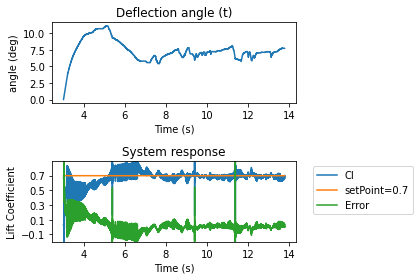

In [34]:
fig, axs = plt.subplots(2,1)
axs[0].plot(varDict["Time"],varDict["angle"],label="deflection angle")
axs[0].set_title("Deflection angle (t)")
axs[0].set_ylabel("angle (deg)")
axs[0].set_xlabel("Time (s)")
axs[0].set_yticks(np.arange(0,12.5,2.5))

axs[1].plot(varDict["Time"],varDict["Cl"],label="Cl")
axs[1].plot(varDict["Time"],setPoint,label="setPoint=0.7")
axs[1].plot(varDict["Time"],varDict["error"],label="Error")
axs[1].set_title("System response")
axs[1].set_ylabel("Lift Coefficient")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylim([-0.2,0.9])
axs[1].set_yticks(np.arange(-0.1,0.9,0.2))
axs[1].legend(loc='upper left',bbox_to_anchor=(1.05,1))
axs[0].set_facecolor('white')
axs[1].set_facecolor('white')
fig.tight_layout()
fig.savefig("PIDcontrol.png",dpi=300)

In [10]:
np.pi

3.141592653589793